# Brain Age Explore

In [2]:
# Import all libraries needed for the exploration

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd #this is how we usually import pandas
import numpy as np #this is how we usually import numpy
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
#import tables # pytables is needed to read and write hdf5 files
#import openpyxl # is used to read and write MS Excel files

#import xgboost
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# Enable inline plotting
%matplotlib inline

In [3]:
# Supress some warnings:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Seaborn version ' + sns.__version__)

Python version 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.25.3
Numpy version 1.17.4
Matplotlib version 3.1.1
Seaborn version 0.9.0


## Training data

In [5]:
data = pd.read_csv('../data/train.csv')

### Explore the data

In [6]:
# Check the number of data points in the data set
print('No observations:', len(data))
# Check the number of features in the data set
print('No variables:', len(data.columns))
# Check the data types
print(data.dtypes.unique())

No observations: 1874
No variables: 150
[dtype('int64') dtype('O') dtype('float64')]


In [7]:
data.shape

(1874, 150)

In [8]:
data.columns

Index(['SubjectID', 'Source', 'ID', 'Sex', 'Height', 'Weight', 'FieldStrength',
       'Handedness', 'Measure:volume', 'Left-Lateral-Ventricle',
       ...
       'rh_superiortemporal_thickness', 'rh_supramarginal_thickness',
       'rh_frontalpole_thickness', 'rh_temporalpole_thickness',
       'rh_transversetemporal_thickness', 'rh_insula_thickness',
       'rh_MeanThickness_thickness', 'BrainSegVolNotVent', 'eTIV_y', 'Age'],
      dtype='object', length=150)

In [9]:
for i, col in enumerate(data.columns, start=0):
    print(i, col)

0 SubjectID
1 Source
2 ID
3 Sex
4 Height
5 Weight
6 FieldStrength
7 Handedness
8 Measure:volume
9 Left-Lateral-Ventricle
10 Left-Inf-Lat-Vent
11 Left-Cerebellum-White-Matter
12 Left-Cerebellum-Cortex
13 Left-Thalamus-Proper
14 Left-Caudate
15 Left-Putamen
16 Left-Pallidum
17 3rd-Ventricle
18 4th-Ventricle
19 Brain-Stem
20 Left-Hippocampus
21 Left-Amygdala
22 CSF
23 Left-Accumbens-area
24 Left-VentralDC
25 Left-vessel
26 Left-choroid-plexus
27 Right-Lateral-Ventricle
28 Right-Inf-Lat-Vent
29 Right-Cerebellum-White-Matter
30 Right-Cerebellum-Cortex
31 Right-Thalamus-Proper
32 Right-Caudate
33 Right-Putamen
34 Right-Pallidum
35 Right-Hippocampus
36 Right-Amygdala
37 Right-Accumbens-area
38 Right-VentralDC
39 Right-vessel
40 Right-choroid-plexus
41 5th-Ventricle
42 WM-hypointensities
43 Left-WM-hypointensities
44 Right-WM-hypointensities
45 non-WM-hypointensities
46 Left-non-WM-hypointensities
47 Right-non-WM-hypointensities
48 Optic-Chiasm
49 CC_Posterior
50 CC_Mid_Posterior
51 CC_Central

In [10]:
# We may have some categorical features, let's check them
data.select_dtypes(include=['O']).columns.tolist()

['Source', 'ID', 'Sex', 'FieldStrength']

In [11]:
# Check any number of columns with NaN
print(data.isnull().any().sum(), ' / ', len(data.columns))
# Check number of data points with any NaN
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

5  /  150
1874  /  1874


### Select features and targets

In [18]:
features = data.iloc[:,9:-1].columns.tolist()
target = data.iloc[:,-1].name

In [19]:
all_lh_features = [
 'CSF', 'CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior', 'EstimatedTotalIntraCranialVol',
 'Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Cerebellum-White-Matter',
 'Left-Cerebellum-Cortex',
 'Left-Thalamus-Proper',
 'Left-Caudate',
 'Left-Putamen',
 'Left-Pallidum',
 'Left-Hippocampus',
 'Left-Amygdala',
 'Left-Accumbens-area',
 'Left-VentralDC',
 'Left-vessel',
 'Left-choroid-plexus',
 'Left-WM-hypointensities',
 'Left-non-WM-hypointensities',
 'lhCortexVol',
 'lhCerebralWhiteMatterVol',            
 'lhSurfaceHoles',  
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_superiortemporal_thickness',
 'lh_supramarginal_thickness',
 'lh_frontalpole_thickness',
 'lh_temporalpole_thickness',
 'lh_transversetemporal_thickness',
 'lh_insula_thickness',
 'lh_MeanThickness_thickness'
 ]

In [21]:
# Make rh_ and Right- names (base on LHs)

# List comprehensions
rh_names = [w.replace('lh_', 'rh_') for w in all_lh_features]
Right_names = [w.replace('Left-', 'Right-') for w in rh_names]
most_rh_names = [w.replace('lhC', 'rhC') for w in Right_names]
all_rh_names = [w.replace('lhS', 'rhS') for w in most_rh_names]
all_rh_features = [w.replace('lh.', 'rh.') for w in all_rh_names]
all_rh_features

['CSF',
 'CC_Posterior',
 'CC_Mid_Posterior',
 'CC_Central',
 'CC_Mid_Anterior',
 'CC_Anterior',
 'EstimatedTotalIntraCranialVol',
 'Right-Lateral-Ventricle',
 'Right-Inf-Lat-Vent',
 'Right-Cerebellum-White-Matter',
 'Right-Cerebellum-Cortex',
 'Right-Thalamus-Proper',
 'Right-Caudate',
 'Right-Putamen',
 'Right-Pallidum',
 'Right-Hippocampus',
 'Right-Amygdala',
 'Right-Accumbens-area',
 'Right-VentralDC',
 'Right-vessel',
 'Right-choroid-plexus',
 'Right-WM-hypointensities',
 'Right-non-WM-hypointensities',
 'rhCortexVol',
 'rhCerebralWhiteMatterVol',
 'rhSurfaceHoles',
 'rh_bankssts_thickness',
 'rh_caudalanteriorcingulate_thickness',
 'rh_caudalmiddlefrontal_thickness',
 'rh_cuneus_thickness',
 'rh_entorhinal_thickness',
 'rh_fusiform_thickness',
 'rh_inferiorparietal_thickness',
 'rh_inferiortemporal_thickness',
 'rh_isthmuscingulate_thickness',
 'rh_lateraloccipital_thickness',
 'rh_lateralorbitofrontal_thickness',
 'rh_lingual_thickness',
 'rh_medialorbitofrontal_thickness',
 'r

In [22]:
data_lh = data[all_lh_features]
pd.DataFrame(data_lh.count())

,0
CSF,1874
CC_Posterior,1874
CC_Mid_Posterior,1874
CC_Central,1874
CC_Mid_Anterior,1874
...,...
lh_frontalpole_thickness,1874
lh_temporalpole_thickness,1874
lh_transversetemporal_thickness,1874
lh_insula_thickness,1874


In [23]:
data_lh.describe().T

,count,mean,std,min,25%,50%,75%,max
CSF,1874.0,1084.643383,302.585929,301.90000,884.700000,1038.70000,1222.475000,3639.60000
CC_Posterior,1874.0,990.799146,163.570664,123.10000,884.350000,987.55000,1088.050000,1824.10000
CC_Mid_Posterior,1874.0,536.534632,129.137433,115.50000,448.350000,529.30000,603.900000,1447.20000
CC_Central,1874.0,615.525560,187.180214,235.70000,457.125000,591.50000,753.175000,1292.00000
CC_Mid_Anterior,1874.0,606.354109,188.045422,247.40000,455.000000,573.60000,737.775000,1294.70000
...,...,...,...,...,...,...,...,...
lh_frontalpole_thickness,1874.0,2.794425,0.298576,1.57900,2.585000,2.79400,2.996000,3.67700
lh_temporalpole_thickness,1874.0,3.642058,0.302271,2.27400,3.457000,3.65250,3.851000,4.50600
lh_transversetemporal_thickness,1874.0,2.288498,0.231052,1.23100,2.139250,2.29750,2.446000,3.04000
lh_insula_thickness,1874.0,2.949150,0.196303,1.49800,2.830250,2.95800,3.080750,3.54600


In [24]:
dropcolumns = [
    'EstimatedTotalIntraCranialVol',
    'CSF', 
    'CC_Posterior', 
    'CC_Mid_Posterior', 
    'CC_Central', 
    'CC_Mid_Anterior', 
    'CC_Anterior'   
]

df_lh = data_lh.drop(dropcolumns, axis=1)
df_lh

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,Left-Amygdala,...,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness
0,26532.5,1880.8,11471.9,47329.2,5892.0,3725.7,3680.4,1729.7,3492.3,1452.2,...,2.037,2.329,1.975,2.651,2.304,2.347,3.501,2.381,2.851,2.24319
1,2284.7,151.9,14570.4,55297.3,8195.4,2924.9,4651.3,1817.0,3773.0,1390.8,...,2.737,3.178,2.546,3.030,2.828,2.904,4.059,2.368,3.031,2.73135
2,3234.5,262.7,14207.8,48093.2,8540.1,3470.4,4589.3,1880.8,4303.1,1793.2,...,2.559,2.943,2.423,3.041,2.835,3.187,3.168,2.401,2.950,2.62238
3,9019.0,244.3,11468.6,45312.4,6513.0,3387.8,4225.0,1678.8,3695.0,1685.0,...,2.552,2.895,2.263,2.557,2.685,3.258,3.628,2.308,3.022,2.55494
4,4964.1,210.5,13951.1,51821.0,7329.7,3288.5,4347.2,1792.6,3894.3,1494.0,...,2.689,3.034,2.462,2.977,2.759,2.935,3.555,2.425,3.237,2.65973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,6092.4,81.1,12890.0,51697.1,6628.1,2882.6,4078.2,2423.2,3941.8,1554.6,...,2.461,3.053,2.408,2.744,2.837,2.886,3.852,2.452,3.131,2.60446
1870,7727.1,116.6,15537.2,61755.3,8300.8,3249.1,4908.3,2041.8,4248.7,1470.5,...,2.389,2.791,1.868,2.758,2.506,3.063,3.452,1.945,2.620,2.32805
1871,16669.5,332.2,15325.0,57329.0,8076.6,3323.1,5008.0,2125.5,4276.9,1490.6,...,2.444,2.886,2.452,2.906,2.712,2.540,3.860,2.271,3.049,2.60346
1872,5531.6,182.3,17084.5,58297.0,7184.3,3223.8,5227.6,2121.2,3573.1,1471.2,...,2.644,2.986,2.433,2.939,2.702,3.080,4.176,2.331,2.963,2.60467


In [25]:
target

'Age'

### Discretization of Age variable
Quantile-based discretization function. Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.

In [35]:
pd.qcut(data['Age'], 17).head(1)

0    (78.0, 85.0]
Name: Age, dtype: category
Categories (17, interval[float64]): [(17.999, 19.0] < (19.0, 20.0] < (20.0, 21.0] < (21.0, 22.0] ... (69.0, 72.0] < (72.0, 74.4] < (74.4, 78.0] < (78.0, 85.0]]

#### Columns with missing values

In [36]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),4).sort_values(ascending=False))

In [37]:
missing(df_lh)

lh_MeanThickness_thickness               0.0
Left-choroid-plexus                      0.0
lh_fusiform_thickness                    0.0
lh_entorhinal_thickness                  0.0
lh_cuneus_thickness                      0.0
lh_caudalmiddlefrontal_thickness         0.0
lh_caudalanteriorcingulate_thickness     0.0
lh_bankssts_thickness                    0.0
lhSurfaceHoles                           0.0
lhCerebralWhiteMatterVol                 0.0
lhCortexVol                              0.0
Left-non-WM-hypointensities              0.0
Left-WM-hypointensities                  0.0
Left-vessel                              0.0
lh_insula_thickness                      0.0
Left-VentralDC                           0.0
Left-Accumbens-area                      0.0
Left-Amygdala                            0.0
Left-Hippocampus                         0.0
Left-Pallidum                            0.0
Left-Putamen                             0.0
Left-Caudate                             0.0
Left-Thala

#### How to remove columns with too many missing values in Python
https://stackoverflow.com/questions/45515031/how-to-remove-columns-with-too-many-missing-values-in-python

In [38]:
def rmissingvaluecol(dff,threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(dff.shape[1] - len(l)))
    print("Columns:\n",list(set(list((dff.columns.values))) - set(l)))
    return l

In [39]:
#Here threshold is 10% which means we are going to drop columns having more than 10% of missing values
rmissingvaluecol(data,10)

# Columns having more than 10 percent missing values: 5
Columns:
 ['Weight', 'Height', 'Handedness', 'ID', 'FieldStrength']


['SubjectID',
 'Source',
 'Sex',
 'Measure:volume',
 'Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Cerebellum-White-Matter',
 'Left-Cerebellum-Cortex',
 'Left-Thalamus-Proper',
 'Left-Caudate',
 'Left-Putamen',
 'Left-Pallidum',
 '3rd-Ventricle',
 '4th-Ventricle',
 'Brain-Stem',
 'Left-Hippocampus',
 'Left-Amygdala',
 'CSF',
 'Left-Accumbens-area',
 'Left-VentralDC',
 'Left-vessel',
 'Left-choroid-plexus',
 'Right-Lateral-Ventricle',
 'Right-Inf-Lat-Vent',
 'Right-Cerebellum-White-Matter',
 'Right-Cerebellum-Cortex',
 'Right-Thalamus-Proper',
 'Right-Caudate',
 'Right-Putamen',
 'Right-Pallidum',
 'Right-Hippocampus',
 'Right-Amygdala',
 'Right-Accumbens-area',
 'Right-VentralDC',
 'Right-vessel',
 'Right-choroid-plexus',
 '5th-Ventricle',
 'WM-hypointensities',
 'Left-WM-hypointensities',
 'Right-WM-hypointensities',
 'non-WM-hypointensities',
 'Left-non-WM-hypointensities',
 'Right-non-WM-hypointensities',
 'Optic-Chiasm',
 'CC_Posterior',
 'CC_Mid_Posterior',
 'CC_Central',

In [40]:
# Now create new dataframe excluding these columns
l = rmissingvaluecol(data,10)
data1 = data[l]

# Columns having more than 10 percent missing values: 5
Columns:
 ['Weight', 'Height', 'Handedness', 'ID', 'FieldStrength']


In [101]:
# missing(data[features])

#### Correlations between features and target

In [41]:
correlations = {}
for f in features:
    data_temp = data1[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [42]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
rh_superiorfrontal_thickness vs Age,-0.787754
lh_superiorfrontal_thickness vs Age,-0.782213
rh_MeanThickness_thickness vs Age,-0.778668
lh_MeanThickness_thickness vs Age,-0.769464
lh_rostralmiddlefrontal_thickness vs Age,-0.739047
...,...
lh_entorhinal_thickness vs Age,-0.025792
Left-WM-hypointensities vs Age,NaN
Right-WM-hypointensities vs Age,NaN
Left-non-WM-hypointensities vs Age,NaN


#### We can see that the top 5 features are the most correlated features with the target "Age"

In [43]:
y = data.loc[:,['lh_insula_thickness','rh_insula_thickness',target]].sort_values(target, ascending=True).values
x = np.arange(y.shape[0])

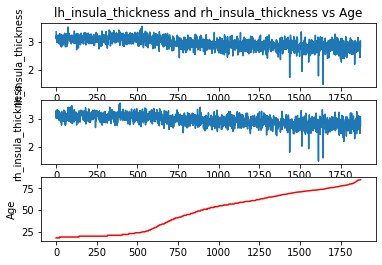

In [44]:
%matplotlib inline
plt.subplot(3,1,1)
plt.plot(x,y[:,0])
plt.title('lh_insula_thickness and rh_insula_thickness vs Age')
plt.ylabel('lh_insula_thickness')

plt.subplot(3,1,2)
plt.plot(x,y[:,1])
plt.ylabel('rh_insula_thickness')

plt.subplot(3,1,3)
plt.plot(x,y[:,2],'r')
plt.ylabel("Age")

plt.show()

### Predicting Age

In [45]:
# Train a simple linear regression model
regr = linear_model.LinearRegression()
new_data = data[features]

In [46]:
X = new_data.values
y = data.Age.values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [48]:
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[ 73.75227195  19.25797874  28.14970237  72.09519798  22.91622764
  61.34399253  42.2594741   39.48243553  49.49024803  10.88036949
  49.48835594  52.82487327  39.26118309  63.27654869  78.98405296
  62.84904319  30.2431472   71.51176292  60.97086937  12.90234214
  56.25616294  49.03570396  76.73322898  71.34823448  69.23701316
  34.45635826  25.11060936  62.68545372  60.95010215  70.32813865
  47.18337852  36.73924095  34.91726524  21.7395919   61.47932273
  38.962416    54.47364647  63.70515281  62.15299827  28.27238304
  21.42298729  27.31481773  27.99639732  47.06213218  70.98295433
  55.79792625  39.54110557  64.19265586  68.36636192  51.62101585
  42.34544212  58.98040611  44.87045127  37.78433067  22.93885643
  67.28663475  60.38223106  67.50842125  70.5555709   42.41561729
  62.36619407  15.71310264  77.59005577  25.84709007  77.34596092
  56.73652488  57.18296653  72.12525779  20.10528404  81.41409141
  27.57876426  26.49719078  30.0364669   60.61179954  77.2564376
  33.522306

In [49]:
regr.score(X_test,y_test)

0.885477172287355

In [50]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 7.44


In [51]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

NameError: name 'xgboost' is not defined

In [125]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

[22:23:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [126]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.32469110931920553


### This is worse than a simple regression model

We can use `.describe()` to calculate simple **descriptive statistics** for the dataset (rounding to 3 decimals):

In [128]:
new_data.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
lh_parsorbitalis_thickness,1085.0,2.762,0.214,1.599,2.629,2.762,2.905,3.462
rh_parsorbitalis_thickness,1085.0,2.771,0.214,1.745,2.632,2.775,2.914,3.505
lh_parahippocampal_thickness,1085.0,2.735,0.298,1.589,2.543,2.737,2.937,3.709
rh_parahippocampal_thickness,1085.0,2.700,0.248,1.780,2.538,2.711,2.859,3.471
Left-Lateral-Ventricle,1085.0,8635.934,5515.628,2284.700,5113.900,7219.100,10394.900,56121.400
Right-Lateral-Ventricle,1085.0,7851.851,5212.003,2222.600,4639.000,6403.600,9455.400,56343.400
lh_insula_thickness,1085.0,2.972,0.194,1.498,2.869,2.979,3.102,3.546
rh_insula_thickness,1085.0,2.988,0.197,1.486,2.871,2.996,3.125,3.586


Computing the **pairwise correlation of columns** (features). Method could be ‘pearson’ (default), ‘kendall’, or ‘spearman’. 

In [129]:
new_data.corr().round(2)

,lh_parsorbitalis_thickness,rh_parsorbitalis_thickness,lh_parahippocampal_thickness,rh_parahippocampal_thickness,Left-Lateral-Ventricle,Right-Lateral-Ventricle,lh_insula_thickness,rh_insula_thickness
lh_parsorbitalis_thickness,1.00,0.59,0.20,0.26,-0.27,-0.29,0.50,0.48
rh_parsorbitalis_thickness,0.59,1.00,0.22,0.29,-0.26,-0.27,0.52,0.52
lh_parahippocampal_thickness,0.20,0.22,1.00,0.70,-0.29,-0.25,0.26,0.25
rh_parahippocampal_thickness,0.26,0.29,0.70,1.00,-0.27,-0.29,0.31,0.33
Left-Lateral-Ventricle,-0.27,-0.26,-0.29,-0.27,1.00,0.92,-0.32,-0.37
Right-Lateral-Ventricle,-0.29,-0.27,-0.25,-0.29,0.92,1.00,-0.32,-0.36
lh_insula_thickness,0.50,0.52,0.26,0.31,-0.32,-0.32,1.00,0.73
rh_insula_thickness,0.48,0.52,0.25,0.33,-0.37,-0.36,0.73,1.00


In [131]:
new_data.describe()

,lh_parsorbitalis_thickness,rh_parsorbitalis_thickness,lh_parahippocampal_thickness,rh_parahippocampal_thickness,Left-Lateral-Ventricle,Right-Lateral-Ventricle,lh_insula_thickness,rh_insula_thickness
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,2.762101,2.770634,2.735071,2.699907,8635.933733,7851.850507,2.972150,2.988305
std,0.214068,0.213805,0.298453,0.248156,5515.628037,5212.003164,0.194034,0.197194
min,1.599000,1.745000,1.589000,1.780000,2284.700000,2222.600000,1.498000,1.486000
25%,2.629000,2.632000,2.543000,2.538000,5113.900000,4639.000000,2.869000,2.871000
50%,2.762000,2.775000,2.737000,2.711000,7219.100000,6403.600000,2.979000,2.996000
75%,2.905000,2.914000,2.937000,2.859000,10394.900000,9455.400000,3.102000,3.125000
max,3.462000,3.505000,3.709000,3.471000,56121.400000,56343.400000,3.546000,3.586000


Splitting the object (iris DataFrame) **into groups** (species)

In [133]:
grouped = data.groupby('Sex')

In [134]:
grouped.groups

{'F': Int64Index([   0,    1,    2,    7,    8,   13,   16,   17,   19,   20,
             ...
             1073, 1075, 1076, 1078, 1079, 1080, 1081, 1082, 1083, 1084],
            dtype='int64', length=611),
 'M': Int64Index([   3,    4,    5,    6,    9,   10,   11,   12,   14,   15,
             ...
             1052, 1053, 1054, 1060, 1061, 1066, 1067, 1071, 1074, 1077],
            dtype='int64', length=474)}

Describe the group-wise `PetalLength` summary statistics

In [135]:
print('Age:')
grouped['Age'].describe()

Age:


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,611.0,42.937321,18.917609,17.0,21.0,46.006845,59.0,81.941136
M,474.0,41.099283,18.111956,17.0,21.0,41.000000,56.0,83.457906


Iterating through the grouped data is very natural

In [136]:
for name, group in grouped:
    print(name,':')
    print(group.describe().round(2).head(3))

F :
       SubjectID  Height  Weight  Handedness  Measure:volume  \
count     611.00  202.00  202.00       81.00           611.0   
mean      764.03  163.23   65.93       94.94             0.0   
std       450.63    7.77   16.09       15.50             0.0   

       Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
count                  611.00             611.00   
mean                  7897.59             289.78   
std                   5118.12             191.02   

       Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  \
count                        611.00                  611.00   
mean                       14641.69                51303.14   
std                         2275.35                 5657.52   

       Left-Thalamus-Proper  ...  rh_superiortemporal_thickness  \
count                611.00  ...                         611.00   
mean                7344.60  ...                           2.81   
std                  895.28  ...                           0.20   

       r

**Group-wise feature correlations**

In [137]:
data.groupby('Age').corr().round(3)

SubjectID  Height  Weight  \
Age                                                                          
17.000000 SubjectID                                    1.0     NaN     NaN   
          Height                                       NaN     NaN     NaN   
          Weight                                       NaN     NaN     NaN   
          Handedness                                   NaN     NaN     NaN   
          Measure:volume                               NaN     NaN     NaN   
          Left-Lateral-Ventricle                      -1.0     NaN     NaN   
          Left-Inf-Lat-Vent                           -1.0     NaN     NaN   
          Left-Cerebellum-White-Matter                 1.0     NaN     NaN   
          Left-Cerebellum-Cortex                       1.0     NaN     NaN   
          Left-Thalamus-Proper                        -1.0     NaN     NaN   
          Left-Caudate                                -1.0     NaN     NaN   
          Left-Putamen                                -1.0     NaN     NaN   
          Left-Pallidum                               -1.0     NaN     NaN   
          3rd-Ventricle                               -1.0     NaN     NaN   
          4th-Ventricle                               -1.0     NaN     NaN   
          Brain-Stem                                  -1.0     NaN     NaN   
          Left-Hippocampus                             1.0     NaN     NaN   
          Left-Amygdala                               -1.0     NaN     NaN   
          CSF                                          1.0     NaN     NaN   
          Left-Accumbens-area                         -1.0     NaN     NaN   
          Left-VentralDC                              -1.0     NaN     NaN   
          Left-vessel                                 -1.0     NaN     NaN   
          Left-choroid-plexus                          1.0     NaN     NaN   
          Right-Lateral-Ventricle                     -1.0     NaN     NaN   
          Right-Inf-Lat-Vent                           1.0     NaN     NaN   
          Right-Cerebellum-White-Matter                1.0     NaN     NaN   
          Right-Cerebellum-Cortex                      1.0     NaN     NaN   
          Right-Thalamus-Proper                       -1.0     NaN     NaN   
          Right-Caudate                               -1.0     NaN     NaN   
          Right-Putamen                               -1.0     NaN     NaN   
...                                                    ...     ...     ...   
83.457906 rh_inferiortemporal_thickness                NaN     NaN     NaN   
          rh_isthmuscingulate_thickness                NaN     NaN     NaN   
          rh_lateraloccipital_thickness                NaN     NaN     NaN   
          rh_lateralorbitofrontal_thickness            NaN     NaN     NaN   
          rh_lingual_thickness                         NaN     NaN     NaN   
          rh_medialorbitofrontal_thickness             NaN     NaN     NaN   
          rh_middletemporal_thickness                  NaN     NaN     NaN   
          rh_parahippocampal_thickness                 NaN     NaN     NaN   
          rh_paracentral_thickness                     NaN     NaN     NaN   
          rh_parsopercularis_thickness                 NaN     NaN     NaN   
          rh_parsorbitalis_thickness                   NaN     NaN     NaN   
          rh_parstriangularis_thickness                NaN     NaN     NaN   
          rh_pericalcarine_thickness                   NaN     NaN     NaN   
          rh_postcentral_thickness                     NaN     NaN     NaN   
          rh_posteriorcingulate_thickness              NaN     NaN     NaN   
          rh_precentral_thickness                      NaN     NaN     NaN   
          rh_precuneus_thickness                       NaN     NaN     NaN   
          rh_rostralanteriorcingulate_thickness        NaN     NaN     NaN   
          rh_rostralmiddlefrontal_thickness            NaN     NaN     

DataFrame has an `assign()` method that allows you to easily create new columns that are potentially derived from existing columns.

In [33]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength']).head().round(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612
2,4.7,3.2,1.3,0.2,Iris-setosa,0.681
3,4.6,3.1,1.5,0.2,Iris-setosa,0.674
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720


In the example above, we inserted a precomputed value. <br>
We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [34]:
iris.assign(sepal_ratio = lambda x: (x['SepalWidth'] /
                                     x['SepalLength'])).head().round(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612
2,4.7,3.2,1.3,0.2,Iris-setosa,0.681
3,4.6,3.1,1.5,0.2,Iris-setosa,0.674
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720


`assign` always returns a copy of the data, leaving the original DataFrame untouched, e.g.

In [35]:
iris.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign``  in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

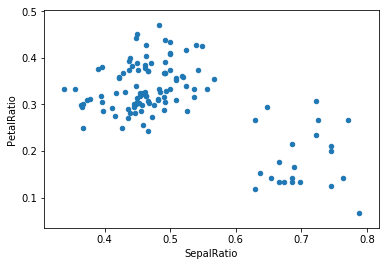

In [36]:
(iris.query('SepalLength > 5')
 .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
         PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
 .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

### Classification

*Organizing data as X and y before classification*

In [ ]:
from sklearn.preprocessing import LabelEncoder

# dfX5Y = pd.read_csv('../results/02_X5Y.csv', sep=',')
# print(dfX5Y.info())
# print(dfX5Y.describe())
# dfX5Y

# Featuer importance XGBoost:
# X = df.loc[:, ['CC_Mid_Anterior_w3', 'BrainSegVol-to-eTIV_w3', 'CSF_w2']] # Top three important features
# Featuer importance RF (Strrop_3):
X = df.loc[:, ['BrainSegVol-to-eTIV_w3', 'CC_Mid_Anterior_w3', 'ic04-ic02']] # Top three important features
# Featuer importance RF predicrting Stroop_1_R_3:
# X = df.loc[:, ['ic09-ic06', 'ic10-ic01', 'ic05-ic03']] # Top three important features
# Featuer importance RF predicrting Stroop_2_R_3:
# X = df.loc[:, ['WM-hypointensities_w3', 'ic17-ic04', 'Left-vessel_w3']] # Top three important features
# X = df.loc[:, ['BrainSegVol-to-eTIV_w3', 'ic04-ic02']] # Two important features
# X = df.loc[:, ['BrainSegVol-to-eTIV_w3', 'CC_Mid_Anterior_w3']] # Top two important features
Y = df.loc[:, ['Stroop_3_cat']]
y = Y.as_matrix().ravel()
np.unique(y)
X.columns

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing

# X = dfX5Y.loc[:, dfX5Y.columns != 'grp']      # Top five important connections
# X = dfX5Y.loc[:, ['ic09-ic02', 'ic04-ic01']]   # Top two important connections
# X = df.loc[:, ['LatVent_w2', 'LatVent_w3', 'ic09-ic02', 'ic04-ic01']]
# X = df.loc[:, ['LatVent_w3', 'ic09-ic02']]
# X = df.loc[:, ['LatVent_w2', 'LatVent_w3']]
# Y = df.loc[:, ['Stroop_3_cat']]

# X = df.loc[:, ['BrainSegVol-to-eTIV_w3', 'CC_Mid_Anterior_w3', 'ic04-ic02']]
# Y = df.loc[:, ['Stroop_3_cat']]
# y = Y.as_matrix().ravel()

rs = 42 # random_state (42)
hls = 3 # MLP hidden layer size (3 or 4)
# https://stackoverflow.com/questions/37659970/how-does-sklearn-compute-the-precision-score-metric
myaverage = 'weighted' # For multilabel classification  'micro', 'macro', 'samples', 'weighted'
# see: https://stackoverflow.com/questions/37659970/how-does-sklearn-compute-the-precision-score-metric

# http://scikit-learn.org/stable/modules/neural_networks_supervised.html
# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that 
# trains using Backpropagation.

# So what about size of the hidden layer(s)--how many neurons? 
# There are some empirically-derived rules-of-thumb, of these, the most 
# commonly relied on is 'the optimal size of the hidden layer is usually 
# between the size of the input and size of the output layers'. 
# Jeff Heaton, author of Introduction to Neural Networks in Java offers a few more.
#
# In sum, for most problems, one could probably get decent performance (even without 
# a second optimization step) by setting the hidden layer configuration using j
# ust two rules: 
#  (i) number of hidden layers equals one; and 
# (ii) the number of neurons in that layer is the mean of the neurons in the 
#      input and output layers.
# Compute the precision
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and 
# fp the number of false positives. The precision is intuitively the ability of the 
# classifier not to label as positive a sample that is negative.

# Compute the recall
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and 
# fn the number of false negatives. The recall is intuitively the ability of the 
# classifier to find all the positive samples.

# Compute the F1 score, also known as balanced F-score or F-measure
# The F1 score can be interpreted as a weighted average of the precision and recall, 
# where an F1 score reaches its best value at 1 and worst score at 0. 
# The relative contribution of precision and recall to the F1 score are equal. 
# The formula for the F1 score is:
#    F1 = 2 * (precision * recall) / (precision + recall)
# In the multi-class and multi-label case, this is the weighted average of the F1 score of each class.

pipe_clf1 = Pipeline([
    ('scl', StandardScaler()),
    #('pca', PCA(n_components=2)),
    ('clf1', LogisticRegression(C=1., solver='saga', n_jobs=1, 
                                multi_class='multinomial', random_state=rs))])

pipe_clf2 = Pipeline([
    ('scl', StandardScaler()),
    #('pca', PCA(n_components=2)),
    ('clf2', MLPClassifier(hidden_layer_sizes=(hls, ),   # =(100, )  ; =(4, )
                          activation='relu', solver='adam',
                          alpha=0.0001, batch_size='auto', learning_rate='constant',
                          learning_rate_init=0.001, power_t=0.5, max_iter=5000,
                          shuffle=True, random_state=rs, tol=0.0001, verbose=False,
                          warm_start=False, momentum=0.9, nesterovs_momentum=True,
                          early_stopping=False, validation_fraction=0.1,
                          beta_1=0.9, beta_2=0.999, epsilon=1e-08))])

# pipe_clf3 = Pipeline([
#     ('scl', StandardScaler()),
#     #('pca', PCA(n_components=2)),
#     ('clf3', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
#                                   min_samples_split=2, min_samples_leaf=1,
#                                   min_weight_fraction_leaf=0.0, max_features='auto',
#                                   max_leaf_nodes=None,     #  min_impurity_split=1e-07,
#                                   bootstrap=True, oob_score=False, n_jobs=1,
#                                   random_state=rs, verbose=0, warm_start=False,
#                                   class_weight=None))])
# pipe_clf3 = Pipeline([
#     ('scl', StandardScaler()),
#     #('pca', PCA(n_components=2)),
#     ('clf3', GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
#                                         max_depth=None, max_features=None, max_leaf_nodes=None,
#                                         min_samples_leaf=1, min_samples_split=2,
#                                         min_weight_fraction_leaf=0.0, n_estimators=100,
#                                         presort='auto', random_state=rs, subsample=1.0, verbose=0,
#                                         warm_start=False)

pipe_clf3 = Pipeline([
    ('scl', StandardScaler()),
    #('pca', PCA(n_components=2)),
    ('clf3', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
                           gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
                           min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
                           objective='multi:softprob', reg_alpha=0, reg_lambda=1,
                           scale_pos_weight=1, seed=rs, silent=True, subsample=1))])
     
pipe_clf4 = Pipeline([
    ('scl', StandardScaler()),
    #('pca', PCA(n_components=2)),
    ('clf4', SVC(C=1.0, probability=True, random_state=rs))])
#    ('clf4', SVC(C=1.0, random_state=rs))])
    
pipe_clf5 = Pipeline([
    ('scl', StandardScaler()),
    #('pca', PCA(n_components=2)),
    ('clf5', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', 
                           leaf_size=30, p=2, metric='minkowski', 
                           metric_params=None, n_jobs=1))])

pipe_clf_vote =  Pipeline([
#    ('scl', StandardScaler()),
    ('clf_vote', VotingClassifier(
        estimators=[('lr', pipe_clf1), 
                 ('mlp', pipe_clf2),
                 ('rf', pipe_clf3),
                 ('svc', pipe_clf4),
                 ('knn', pipe_clf5)],
     voting = 'soft'))])
#     voting = 'hard'))])

scores1_acc, scores2_acc, scores3_acc, scores4_acc, scores5_acc, scores_vote_acc = [], [], [], [], [], []
scores1_pre, scores2_pre, scores3_pre, scores4_pre, scores5_pre, scores_vote_pre = [], [], [], [], [], []
scores1_rec, scores2_rec, scores3_rec, scores4_rec, scores5_rec, scores_vote_rec = [], [], [], [], [], []
scores1_f1, scores2_f1, scores3_f1, scores4_f1, scores5_f1, scores_vote_f1 = [], [], [], [], [], []

n_splits = 10  # k=10
# n_splits = X.shape[0]   # i.e.  Leave One Out strategy
# for train_index, test_index in LeaveOneOut.split(X):

k=1
for train_index, test_index in \
StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rs).split(X,y):
    print("Fold number:", k)
    #print("\nTRUE class:\n", list(y[test_index]))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    #clf1 = LogisticRegression
    print(" - LogisticRegression")
    pipe_clf1.fit(X_train, y_train)
    scores1_acc.append(accuracy_score(y_test, pipe_clf1.predict(X_test)))
    scores1_pre.append(precision_score(y_test, pipe_clf1.predict(X_test), average=myaverage))
    scores1_rec.append(recall_score(y_test, pipe_clf1.predict(X_test), average=myaverage))
    scores1_f1.append(f1_score(y_test, pipe_clf1.predict(X_test), average=myaverage))
    print('    Precision: %.2f' % (precision_score(y_test, pipe_clf1.predict(X_test), average=myaverage)))
    print('    Recall: %.2f' % (recall_score(y_test, pipe_clf1.predict(X_test), average=myaverage)))
    #print("LR predicted:\n", list(pipe_clf1.predict(X_test)))
    
    #clf2 = MLPClassifier
    print(" - MLPClassifier")
    pipe_clf2.fit(X_train, y_train)
    scores2_acc.append(accuracy_score(y_test, pipe_clf2.predict(X_test)))
    scores2_pre.append(precision_score(y_test, pipe_clf2.predict(X_test), average=myaverage))
    scores2_rec.append(recall_score(y_test, pipe_clf2.predict(X_test), average=myaverage))
    scores2_f1.append(f1_score(y_test, pipe_clf2.predict(X_test), average=myaverage))
    print('    Precision: %.2f' % (precision_score(y_test, pipe_clf2.predict(X_test), average=myaverage)))
    print('    Recall: %.2f' % (recall_score(y_test, pipe_clf2.predict(X_test), average=myaverage)))
    #print("MLP predicted:\n", list(pipe_clf2.predict(X_test)))
    
    #clf3 = RandomForestClassifier
    #print(" - RandomForestClassifier")
    #clf3 = XGBoost
    print(" - XGBoost")
    pipe_clf3.fit(X_train, y_train)
    scores3_acc.append(accuracy_score(y_test, pipe_clf3.predict(X_test)))
    scores3_pre.append(precision_score(y_test, pipe_clf3.predict(X_test), average=myaverage))
    scores3_rec.append(recall_score(y_test, pipe_clf3.predict(X_test), average=myaverage))
    scores3_f1.append(f1_score(y_test, pipe_clf3.predict(X_test), average=myaverage))
    print('    Precision: %.2f' % (precision_score(y_test, pipe_clf3.predict(X_test), average=myaverage)))
    print('    Recall: %.2f' % (recall_score(y_test, pipe_clf3.predict(X_test), average=myaverage)))
    #print("RF predicted:\n", list(pipe_clf3.predict(X_test)))
    #print("XGB predicted:\n", list(pipe_clf3.predict(X_test)))
    
    #clf4 = svm.SVC()
    print(" - svm/SVC")
    pipe_clf4.fit(X_train, y_train)
    scores4_acc.append(accuracy_score(y_test, pipe_clf4.predict(X_test)))
    scores4_pre.append(precision_score(y_test, pipe_clf4.predict(X_test), average=myaverage))
    scores4_rec.append(recall_score(y_test, pipe_clf4.predict(X_test), average=myaverage))
    scores4_f1.append(f1_score(y_test, pipe_clf4.predict(X_test), average=myaverage))
    print('    Precision: %.2f' % (precision_score(y_test, pipe_clf4.predict(X_test), average=myaverage)))
    print('    Recall: %.2f' % (recall_score(y_test, pipe_clf4.predict(X_test), average=myaverage)))
    #print("SVM predicted:\n", list(pipe_clf4.predict(X_test)))
    
        #clf5 = KNeighborsClassifier
    print(" - KNN")
    pipe_clf5.fit(X_train, y_train)
    scores5_acc.append(accuracy_score(y_test, pipe_clf5.predict(X_test)))
    scores5_pre.append(precision_score(y_test, pipe_clf5.predict(X_test), average=myaverage))
    scores5_rec.append(recall_score(y_test, pipe_clf5.predict(X_test), average=myaverage))
    scores5_f1.append(f1_score(y_test, pipe_clf5.predict(X_test), average=myaverage))
    #print("KNN predicted:\n", list(pipe_clf5.predict(X_test)))
    
    #clf_vote = VotingClassifier
    print(" - VotingClassifier")
    pipe_clf_vote.fit(X_train, y_train)
    scores_vote_acc.append(accuracy_score(y_test, pipe_clf_vote.predict(X_test)))
    scores_vote_pre.append(precision_score(y_test, pipe_clf_vote.predict(X_test), average=myaverage))
    scores_vote_rec.append(recall_score(y_test, pipe_clf_vote.predict(X_test), average=myaverage))
    scores_vote_f1.append(f1_score(y_test, pipe_clf_vote.predict(X_test), average=myaverage))
    print('    Precision: %.2f' % (precision_score(y_test, pipe_clf_vote.predict(X_test), average=myaverage)))
    print('    Recall: %.2f' % (recall_score(y_test, pipe_clf_vote.predict(X_test), average=myaverage)))
    k=k+1
    
print('\nPredictors:')
print('X.columns = %s' % list(X.columns))

print('\nOutcome:')
print(pd.qcut(df['Stroop_3_R_3'], 3).head(0))
print(np.unique(y))

print('\nSome hyperparameters:')
print("MLP hidden_layer_size = %d" % (hls))
print("random_state = %d" % (rs))
print("score average = '%s'" % (myaverage))

print("\nLR : CV accuracy = %.3f +-%.3f (k=%d)" % (np.mean(scores1_acc), np.std(scores1_acc), n_splits))
print("MLP: CV accuracy = %.3f +-%.3f (k=%d)" % (np.mean(scores2_acc), np.std(scores2_acc), n_splits))
# print("RF : CV accuracy = %.3f +-%.3f (k=%d)" % (np.mean(scores3_acc), np.std(scores3_acc), n_splits))
print("XGB : CV accuracy = %.3f +-%.3f (k=%d)" % (np.mean(scores3_acc), np.std(scores3_acc), n_splits))
print("SVM: CV accuracy = %.3f +-%.3f (k=%d)" % (np.mean(scores4_acc), np.std(scores4_acc), n_splits))
print("KNN: CV accuracy = %.3f +-%.3f (k=%d)" % (np.mean(scores5_acc), np.std(scores5_acc), n_splits))
print("Voting: CV accuracy = %.3f +-%.3f (k=%d)" % (np.mean(scores_vote_acc), np.std(scores_vote_acc), n_splits))

print("\nLR : CV precision = %.3f +-%.3f (k=%d)" % (np.mean(scores1_pre), np.std(scores1_pre), n_splits))
print("MLP: CV precision = %.3f +-%.3f (k=%d)" % (np.mean(scores2_pre), np.std(scores2_pre), n_splits))
print("XGB : CV precision = %.3f +-%.3f (k=%d)" % (np.mean(scores3_pre), np.std(scores3_pre), n_splits))
print("SVM: CV precision = %.3f +-%.3f (k=%d)" % (np.mean(scores4_pre), np.std(scores4_pre), n_splits))
print("KNN: CV precision = %.3f +-%.3f (k=%d)" % (np.mean(scores5_pre), np.std(scores5_pre), n_splits))
print("Voting: CV precision = %.3f +-%.3f (k=%d)" % (np.mean(scores_vote_pre), np.std(scores_vote_pre), n_splits))

print("\nLR : CV recall = %.3f +-%.3f (k=%d)" % (np.mean(scores1_rec), np.std(scores1_rec), n_splits))
print("MLP: CV recall = %.3f +-%.3f (k=%d)" % (np.mean(scores2_rec), np.std(scores2_rec), n_splits))
print("XGB : CV recall = %.3f +-%.3f (k=%d)" % (np.mean(scores3_rec), np.std(scores3_rec), n_splits))
print("SVM: CV recall = %.3f +-%.3f (k=%d)" % (np.mean(scores4_rec), np.std(scores4_rec), n_splits))
print("KNN: CV recall = %.3f +-%.3f (k=%d)" % (np.mean(scores5_rec), np.std(scores5_rec), n_splits))
print("Voting: CV recall = %.3f +-%.3f (k=%d)" % (np.mean(scores_vote_rec), np.std(scores_vote_rec), n_splits))

print("\nLR : CV F1-score = %.3f +-%.3f (k=%d)" % (np.mean(scores1_f1), np.std(scores1_f1), n_splits))
print("MLP: CV F1-score = %.3f +-%.3f (k=%d)" % (np.mean(scores2_f1), np.std(scores2_f1), n_splits))
print("XGB : CV F1-score = %.3f +-%.3f (k=%d)" % (np.mean(scores3_f1), np.std(scores3_f1), n_splits))
print("SVM: CV F1-score = %.3f +-%.3f (k=%d)" % (np.mean(scores4_f1), np.std(scores4_f1), n_splits))
print("KNN: CV F1-score = %.3f +-%.3f (k=%d)" % (np.mean(scores5_f1), np.std(scores5_f1), n_splits))
print("Voting: CV F1-score = %.3f +-%.3f (k=%d)" % (np.mean(scores_vote_f1), np.std(scores_vote_f1), n_splits))